<a href="https://colab.research.google.com/github/AnirbanMukherjeeXD/Explore-ML-Materials/blob/master/ExploreML_BanknoteAuthentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Note Authentication

##Importing Libraries

In [0]:
#Dataset handling
import pandas as pd

#Numpy operations
import numpy as np

#Graph plotting
import matplotlib.pylab as plt
import seaborn as sns

##Importing dataset

***Reading dataset from csv file***

In [0]:
url='https://raw.githubusercontent.com/AnirbanMukherjeeXD/Explore-ML-Materials/master/datasets/Banknote_data.csv'
dataset=pd.read_csv(url)

***Displaying first 5 rows***

In [0]:
dataset.head()

,variance_wti,skewness_wti,curtosis_wti,entropy_wti,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


*Last column has the output (0 or 1). All remaining columns are inputs.*

***Seeing the class distribution***

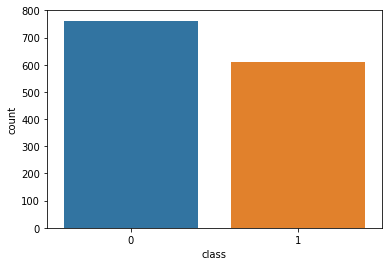

In [0]:
sns.countplot(x=dataset.iloc[:,-1],data=dataset)

##Data Preparation

***Splitting into inputs (X) and outputs (Y)***

In [0]:
#Inputs
X=dataset.iloc[:,0:-1]

#Outputs
Y=dataset.iloc[:,-1]

***Splitting into train and test set***

In [0]:
#Importing module
from sklearn.model_selection import train_test_split

#Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

***Feature Scaling***

In [0]:
#Importing module
from sklearn.preprocessing import StandardScaler

#Crearing scaler object
scaler = StandardScaler()

#Transforming X
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Model

**Create model**

In [0]:
#Importing module
from sklearn.svm import SVC

#Creaing model object
model=SVC(kernel='linear')

**Train model**

In [0]:
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

**Make predictions using model and evaluate result**

In [0]:
#Importing modules for metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [0]:
#Training set predictions
Y_train_pred=model.predict(X_train)
print(accuracy_score(Y_train,Y_train_pred))

0.9881494986326345


In [0]:
#Test set predictions
Y_test_pred=model.predict(X_test)
print(accuracy_score(Y_test,Y_test_pred))

0.9854545454545455


**Confusion Matrix**

*By definition a confusion matrix `C` is such that `C[i, j]` is equal to the number of observations known to be in group `i` but predicted to be in group `j`*

In [0]:
#Training set
print(confusion_matrix(Y_train,Y_train_pred))

[[601  13]
 [  0 483]]


![](https://miro.medium.com/max/765/1*OWyKjukGGKCvrnE30763qA.png)

In [0]:
#Test setconfusion_matrixconfusion_matrix
print(confusion_matrix(Y_test,Y_test_pred))

[[146   2]
 [  2 125]]
